# Hypothyroid prediction using Light GBM classifier 

In [1]:
import pandas as pd
import numpy as np

In [1]:
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")

file_handler = open("F:\\Thyroid final\\hypothyroid.csv", "r") 
df = pd.read_csv(file_handler, sep = ",") 
file_handler.close() 


In [2]:
df.loc[df['Age'] == '455', 'Age'] = '45'

In [3]:
df.dropna(inplace=True)
df.replace(to_replace='?', inplace=True)
df.dropna(inplace=True)
df = df.replace(to_replace={'f':0,'t':1, 'y':1, 'n':0,'M':0,'F':1})
df = df.replace(to_replace={'?':True})
df.dropna(inplace=True)


In [4]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
df["class"] = lb_make.fit_transform(df["class"])


In [5]:
df.head(5)

,class,Age,Sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,0,72,0,0,0,0,0,0,0,0,...,1,0.6,1,15,1,1.48,1,10,0,True
1,0,15,1,1,0,0,0,0,0,0,...,1,1.7,1,19,1,1.13,1,17,0,True
2,0,24,0,0,0,0,0,0,0,0,...,1,0.2,1,4,1,1,1,0,0,True
3,0,24,1,0,0,0,0,0,0,0,...,1,0.4,1,6,1,1.04,1,6,0,True
4,0,77,0,0,0,0,0,0,0,0,...,1,1.2,1,57,1,1.28,1,44,0,True


In [6]:
df.describe()

,class,Sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,T3_measured,TT4_measured,T4U_measured,FTI_measured,TBG_measured
count,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000
mean,0.952261,0.706291,0.145748,0.017389,0.013279,0.032880,0.076193,0.076826,0.019918,0.031299,0.012646,0.000632,0.031299,0.852039,0.780272,0.921277,0.921593,0.921910,0.082200
std,0.213248,0.455532,0.352909,0.130735,0.114483,0.178351,0.265349,0.266357,0.139740,0.174153,0.111760,0.025142,0.174153,0.355117,0.414128,0.269348,0.268853,0.268356,0.274713
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


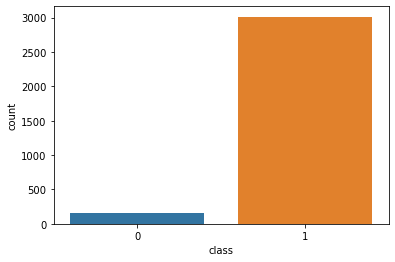

In [7]:
import seaborn as sns
sns.countplot(x="class",data=df)

In [8]:

x=df.drop('class',axis=1)
y=df["class"]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.4,random_state=0)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [9]:
import lightgbm as ltb
model = ltb.LGBMClassifier()
model.fit(x_train, y_train)


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [10]:
    from sklearn import metrics

    expected_y  = y_test
    y_pred = model.predict(x_test)
    
    # summarize the fit of the model
    print(); print(metrics.classification_report(expected_y,y_pred))
    print(); print(metrics.confusion_matrix(expected_y, y_pred))
    print("Accuracy:  ",metrics.accuracy_score(expected_y, y_pred))


              precision    recall  f1-score   support

           0       0.92      0.90      0.91        61
           1       1.00      1.00      1.00      1205

    accuracy                           0.99      1266
   macro avg       0.96      0.95      0.95      1266
weighted avg       0.99      0.99      0.99      1266


[[  55    6]
 [   5 1200]]
Accuracy:   0.9913112164296999


In [11]:
# calculate accuracy
from sklearn import metrics
print("ACCURACY:")
print(metrics.accuracy_score(y_test, y_pred))


ACCURACY:
0.9913112164296999


In [12]:
y_test.value_counts()

1    1205
0      61
Name: class, dtype: int64

In [13]:
# calculate the percentage of ones
# because y_test only contains ones and zeros, we can simply calculate the mean = percentage of ones
print("Percentage of ones")
y_test.mean()


Percentage of ones


0.9518167456556083

In [14]:
print("Percentage of zeros")
1 - y_test.mean()


Percentage of zeros


0.048183254344391746

In [15]:
# calculate null accuracy in a single line of code
# only for binary classification problems coded as 0/1
max(y_test.mean(), 1 - y_test.mean())


0.9518167456556083

In [16]:
confusion = metrics.confusion_matrix(y_test, y_pred)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]


[[  55    6]
 [   5 1200]]


In [17]:
print("classification_error")
print(1 - metrics.accuracy_score(y_test, y_pred))


classification_error
0.008688783570300118


In [18]:
print("sensitivity")
print(metrics.recall_score(y_test, y_pred))


sensitivity
0.995850622406639


In [19]:
print("True Positive Rate")
specificity = TN / (TN + FP)

print(specificity)


True Positive Rate
0.9016393442622951


In [20]:
false_positive_rate = FP / float(TN + FP)
print("false_positive_rate")
print(false_positive_rate)

false_positive_rate
0.09836065573770492


In [21]:
print("precision")
print(metrics.precision_score(y_test, y_pred))

precision
0.9950248756218906


In [22]:
print("roc_auc_score")
print(metrics.roc_auc_score(y_test, y_pred))

roc_auc_score
0.9487449833344671


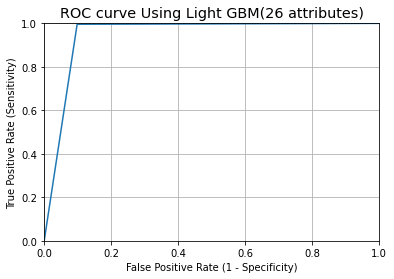

In [23]:
import matplotlib.pyplot as plt
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve Using Light GBM(26 attributes)')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)


In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
cv_results


array([1.        , 0.99473684, 0.98947368, 1.        , 1.        ,
       0.99473684, 1.        , 1.        , 1.        , 1.        ])

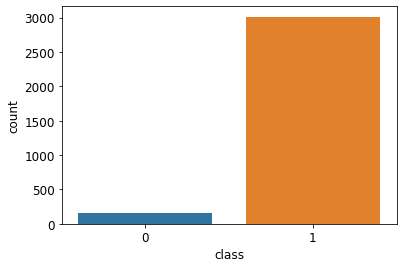

In [25]:
import seaborn as sns
sns.countplot(x="class",data=df)

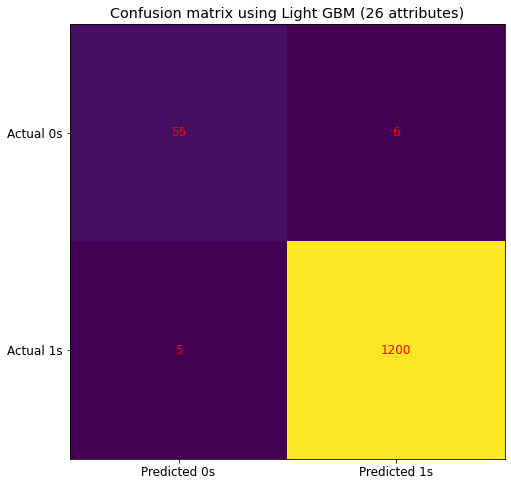

In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, model.predict(x_test))
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.title("Confusion matrix using Light GBM (26 attributes)")
plt.show()


In [27]:
from sklearn.metrics import f1_score
score = f1_score(y_test, y_pred, average='binary')
print('F-Measure: %.3f' % score)

F-Measure: 0.995


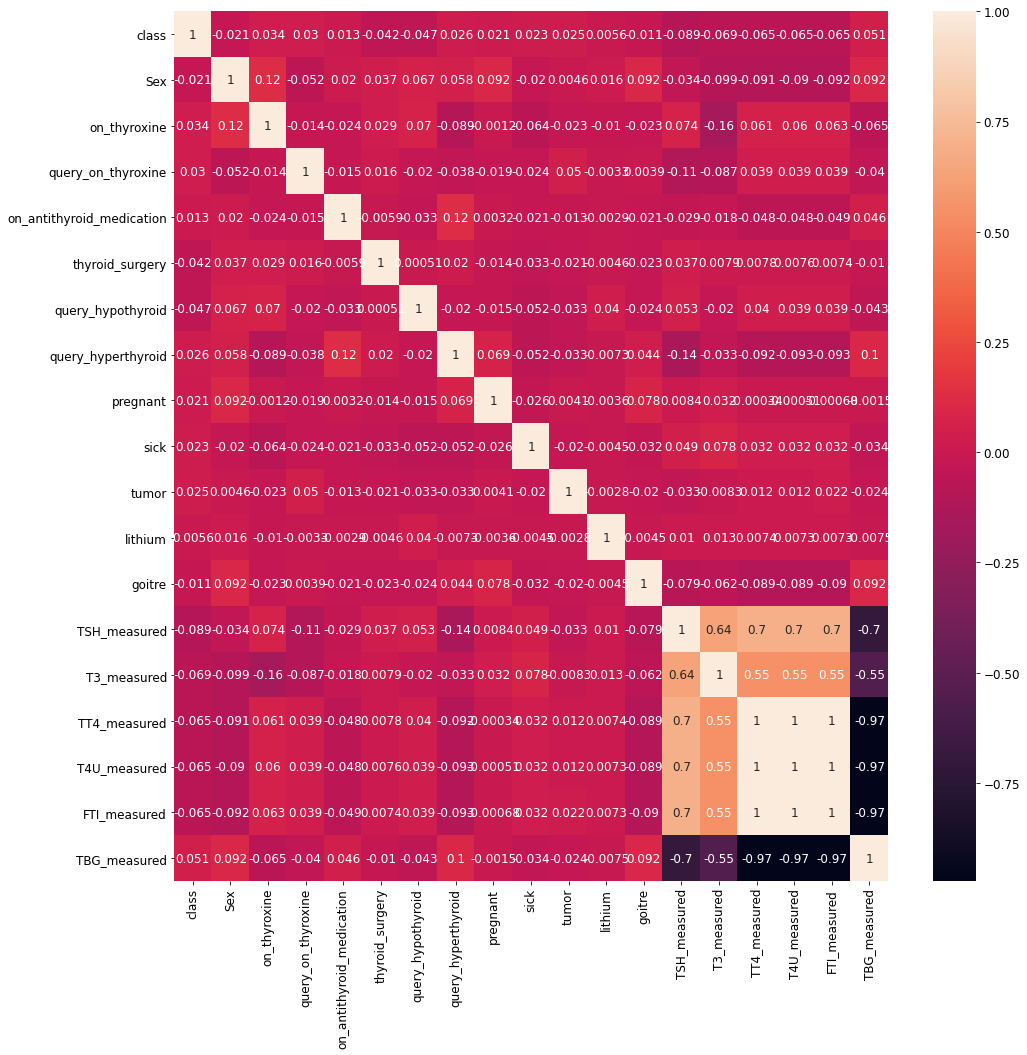

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16,16))
sns.heatmap(df.iloc[:,0:].corr(),annot=True)